### Saman Davachi Tousi
### 810101420
### CA3-AI

#### `Preprocess` and `Extaraction` of Data

In [1]:
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array

vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


In [2]:
def load_and_preprocess_image(image_path):
    img = load_img(image_path, target_size=(224, 224))
    img_array = img_to_array(img)
    img_array = preprocess_input(img_array)
    return img_array

In [3]:
import os

image_directory = './flower_images'
image_files = os.listdir(image_directory)
features_list = []  
for image_file in image_files:
    image_path = os.path.join(image_directory, image_file)
    img_array = load_and_preprocess_image(image_path)
    features = vgg_model.predict(tf.expand_dims(img_array, axis=0))
    features_list.append(features)


1/1 [==============================] - 0s 63ms/step


In [4]:
features = vgg_model.predict(tf.expand_dims(img_array, axis=0))


1/1 [==============================] - 0s 49ms/step


#### `Pixel VS. vgg16 model`

Reading pixel refers to a simple method of classifying images based on the raw pixel values, while VGG16 is a deep convolutional neural network model that has been pre-trained on a large dataset.

The VGG16 model is known for its high accuracy in image classification tasks, but it requires a large amount of computational resources and training data. On the other hand, reading pixel is a more straightforward approach that may not achieve the same level of accuracy but can be implemented quickly and with less computational cost.

#### `Methods` of extracting data from images:

To extract data from an image in a research paper, various methods and algorithms have been proposed in different studies. One approach involves utilizing image fragmentation for multimedia data mining, where image properties like speed, color, and shape are analyzed for efficient retrieval . Another method involves developing image processing algorithms to automatically extract data from graphs with minimal user input, ensuring accuracy close to raw data with less than 1% error. Additionally, systems have been designed to extract data from images using optical character recognition (OCR) and machine learning algorithms to classify text lines and extract data fields from them . Furthermore, machine learning models have been employed to extract image features for physical detection and classification tasks with high accuracy and acceptable computation time. These diverse approaches showcase the advancements in extracting data from images in research papers.



#### what `preprocess` should be done on `image dataset`

Some powerful image preprocessing techniques include noise reduction, contrast enhancement, image resizing, color correction, segmentation, feature extraction, etc. It is an essential step in image analysis that helps enhance the data in images and reduce clutter.

#### `K_means clustering`


In [5]:
import numpy as np
from sklearn.cluster import KMeans

features_array = np.vstack(features_list)
num_images, num_channels, height, width = features_array.shape
features_flat = features_array.reshape(num_images, num_channels * height * width)
num_clusters = 7
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(features_flat)
cluster_labels = kmeans.labels_
print("Cluster Centers (Centroids):")
print(kmeans.cluster_centers_)


Cluster Centers (Centroids):
[[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
   1.9737394e+00  0.0000000e+00]
 [ 5.5044001e-01  0.0000000e+00  3.8165641e-01 ...  0.0000000e+00
   1.7515514e+00  2.9553056e-01]
 [ 8.5246079e-02  1.1529641e+00  8.8681161e-01 ...  9.9873894e-01
   1.5981449e+00  2.0192176e-01]
 ...
 [-1.4901161e-08  1.4901161e-08  0.0000000e+00 ...  0.0000000e+00
   3.9891527e+00  5.3150129e-01]
 [-1.4901161e-08  0.0000000e+00  1.6978884e+00 ... -1.4901161e-08
   1.5099673e+00  2.4429135e+00]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
   1.5219038e+00  4.4071288e+00]]


#### `Methods` of finding `best` `k value` for K_means algorithm

`Elbow Method`: The elbow method helps us identify the point where the reduction in within-cluster sum of squares (WSS) starts to slow down. The “elbow” point represents a good trade-off between model complexity and data fit. 

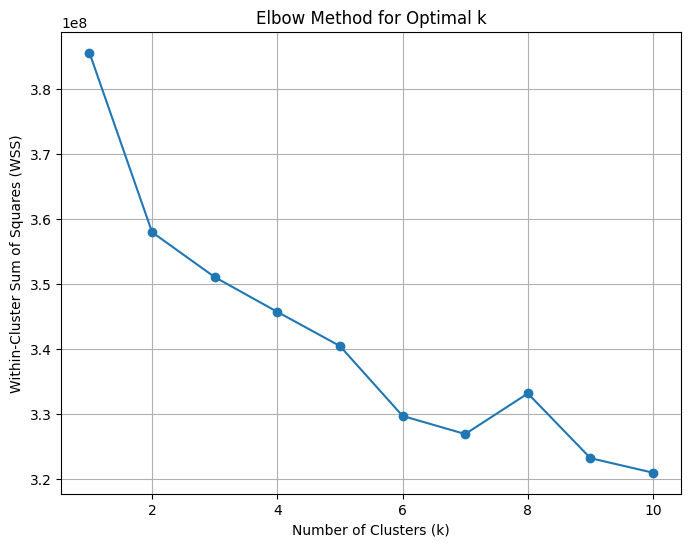

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wss = []  
num_images, num_channels, height, width = features_array.shape
features_flat = features_array.reshape(num_images, num_channels * height * width)
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_flat)
    wss.append(kmeans.inertia_)  
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WSS)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()


`Silhouette Score`: The silhouette score measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation). Higher silhouette scores indicate better-defined clusters.

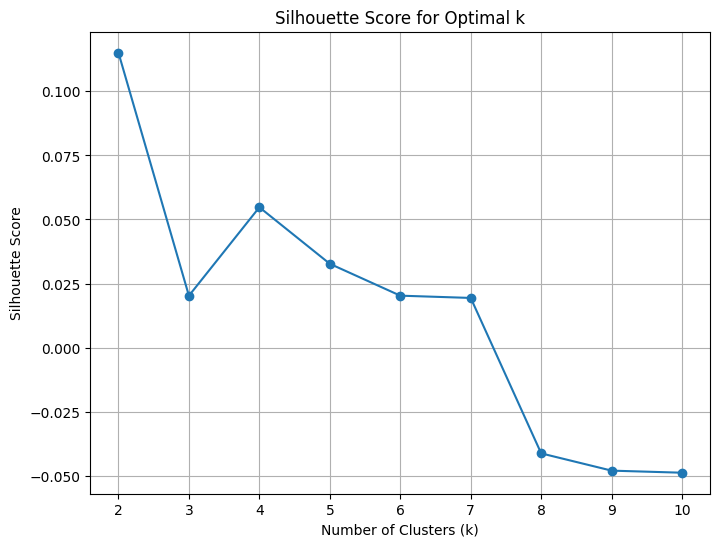

In [7]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
num_images, num_channels, height, width = features_array.shape
features_flat = features_array.reshape(num_images, num_channels * height * width)

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_flat)
    silhouette_scores.append(silhouette_score(features_flat, kmeans.labels_))

plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.grid(True)
plt.show()


#### `DBSCAN Clustering`

In [8]:
import numpy as np
from sklearn.cluster import DBSCAN
import pandas as pd

features_array = np.vstack(features_list)
num_images, num_channels, height, width = features_array.shape
features_flat = features_array.reshape(num_images, num_channels * height * width)

df = pd.DataFrame(features_flat, columns=[f"feature_{i}" for i in range(features_flat.shape[1])])
dbscan = DBSCAN(eps=4.54, min_samples=4)
dbscan.fit(df)
cluster_labels = dbscan.labels_
unique_clusters = set(cluster_labels)
print("Unique clusters:", unique_clusters)

# -1 value represents noisy points (could not be assigned to any cluster)


Unique clusters: {-1}


#### `DBSCAN VS. K.Means`

`Differences between` the two algorithms:

DBSCAN is a density-based clustering algorithm, whereas K-Means is a centroid-based clustering algorithm.
DBSCAN can discover clusters of arbitrary shapes, whereas K-Means assumes that the clusters are spherical.
DBSCAN does not require the number of clusters to be specified in advance, whereas K-Means requires the number of clusters to be specified.
DBSCAN is less sensitive to initialization than K-Means.
`When` to use `DBSCAN vs. K-Means`?

Use DBSCAN when the data has irregular shapes or when there is no prior knowledge about the number of clusters.
Use K-Means when the data has spherical shapes and when the number of clusters is known beforehand.
If you are unsure which algorithm to use, it is always a good idea to try both algorithms and compare their results.

#### `PCA` method

Principal component analysis (PCA) is a linear dimensionality reduction technique with applications in exploratory data analysis, visualization and data preprocessing.

The data is linearly transformed onto a new coordinate system such that the directions (principal components) capturing the largest variation in the data can be easily identified.

PCA is defined as an orthogonal linear transformation on a real inner product space that transforms the data to a new coordinate system such that the greatest variance by some scalar projection of the data comes to lie on the first coordinate (called the first principal component), the second greatest variance on the second coordinate, and so on.

##### `PCA with K-means`

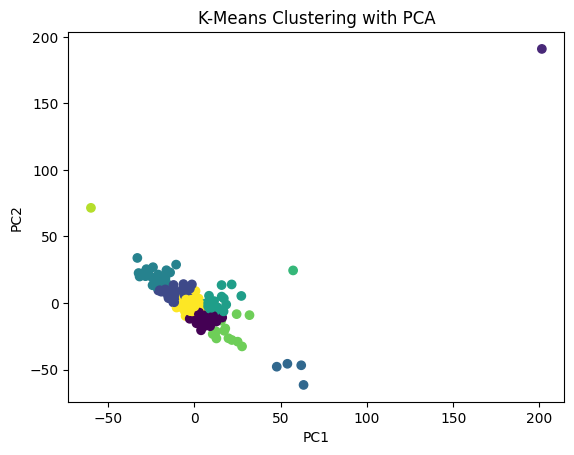

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_flat)
pca = PCA(n_components=2)  # You can choose the number of components
reduced_features = pca.fit_transform(scaled_features)
kmeans = KMeans(n_clusters=10)  # Choose the appropriate number of clusters
kmeans.fit(reduced_features)
cluster_labels = kmeans.labels_
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-Means Clustering with PCA')
plt.show()


##### `PCA with BDSCAN`

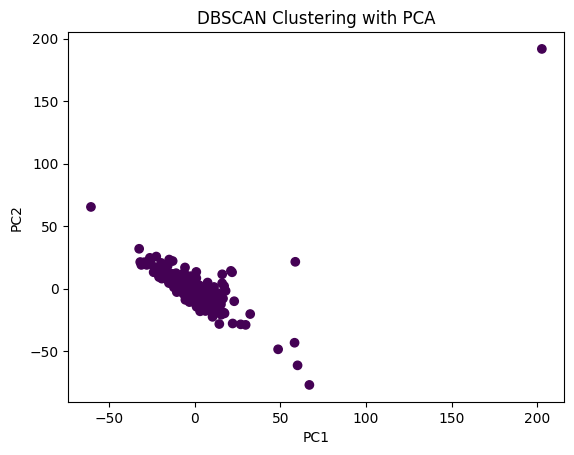

Unique clusters: {-1}


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_flat)
pca = PCA(n_components=2)  
reduced_features = pca.fit_transform(scaled_features)
dbscan = DBSCAN(eps=0.5, min_samples=5)
cluster_labels = dbscan.fit_predict(reduced_features)
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('DBSCAN Clustering with PCA')
plt.show()
unique_clusters = set(cluster_labels)
print(f"Unique clusters: {unique_clusters}")


#### `Homogeneity`

Homogeneity is the level of uniformity among sampling units within a population. Homogeneity is commonly interpreted as meaning that all the items in the sample are chosen because they have similar or identical traits (for example, people in a homogeneous sample might share the same age, location, or employment).

#### `silhouette`

The silhouette coefficient or silhouette score kmeans is a measure of how similar a data point is within-cluster (cohesion) compared to other clusters (separation). The Silhouette score can be easily calculated in Python using the metrics module of the scikit-learn/sklearn library.

##### `Homogenity` and `Silhouette` for `kmeans method`

In [18]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=7)
kmeans.fit(reduced_features)
cluster_labels =kmeans.labels_
real_labels = pd.read_csv('./flower_labels.csv')
silhouette_avg = silhouette_score(reduced_features, cluster_labels)
print(f"Silhouette Score: {silhouette_avg:.4f}")

Silhouette Score: 0.4018


In [12]:
import pandas as pd
import numpy as np
from sklearn.metrics import homogeneity_score

df = pd.read_csv('./flower_labels.csv')
true_labels = df['label']
homogeneity = homogeneity_score(true_labels, kmeans.labels_)
print(f"Homogeneity Score: {homogeneity:.4f}")


Homogeneity Score: 0.4021


##### `Homogenity` and `Silhouette` for `DBSCAN`

In [19]:
import pandas as pd

data = pd.read_csv('flower_labels.csv')
scores = data['label'].values.reshape(-1, 1)
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(reduced_features)
cluster_labels = dbscan.labels_
silhouette_avg = silhouette_score(reduced_features, cluster_labels)
print(f"Silhouette Score (DBSCAN): {silhouette_avg:.4f}")



ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [20]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(reduced_features)
cluster_labels = dbscan.labels_
homogeneity = homogeneity_score(real_labels["label"], cluster_labels)
print(f"Homogeneity Score (DBSCAN): {homogeneity:.4f}")

Homogeneity Score (DBSCAN): 0.0000


##### Tactics to `Improve` your `Cluster Analysis`

Standardize your data: Make sure all features are on the same scale before clustering.

Choose the right number of clusters: Experiment with different numbers of clusters to find the optimal value.

Use different clustering algorithms: Try different clustering algorithms (e.g. KMeans, DBSCAN, Hierarchical clustering) to see which one gives the best silhouette score.

Tune hyperparameters: Adjust hyperparameters of the clustering algorithm to improve silhouette score.

Remove noisy data: Outliers and noisy data points can negatively impact silhouette score, so consider removing them before clustering.
In this sample using vgg19